In [0]:
import math
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tqdm

def distance(X, Y):
  D4 = (X**2).sum(axis=1)[np.newaxis].T - 2 * X.dot(Y.T) + (Y**2).sum(axis=1)[np.newaxis]
  return D4

def KNN(X_train, Y_train, X_test, ks):
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)

    dists = distance(X_train, X_test)
    
    # find closest trainig points
    closest = np.argsort(dists, axis=0)
    
    # closest trainig points - > closest trainig targets
    targets = Y_train[closest]
  
    # Alloc space for results
    preds = {}
    for k in ks:
        predictions = scipy.stats.mode(targets[:k])[0] #take k closest targets
        predictions = predictions.ravel()
        preds[k] = predictions
    return preds

In [0]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [0]:
train, test = train_test_split(iris_df, test_size=0.3333)

In [0]:
train_iris_x = np.array(train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
train_iris_y = np.array(train['target'])

test_iris_x = np.array(test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
test_iris_y = np.array(test['target'])

In [126]:
ks = np.arange(1,10,1)
predictions = KNN(train_iris_x, train_iris_y, test_iris_x, ks)

for k, preds in predictions.items():
    result = list(preds == test_iris_y)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 96.0%
Score for k = 2 is: 94.0%
Score for k = 3 is: 96.0%
Score for k = 4 is: 96.0%
Score for k = 5 is: 96.0%
Score for k = 6 is: 96.0%
Score for k = 7 is: 96.0%
Score for k = 8 is: 98.0%
Score for k = 9 is: 96.0%


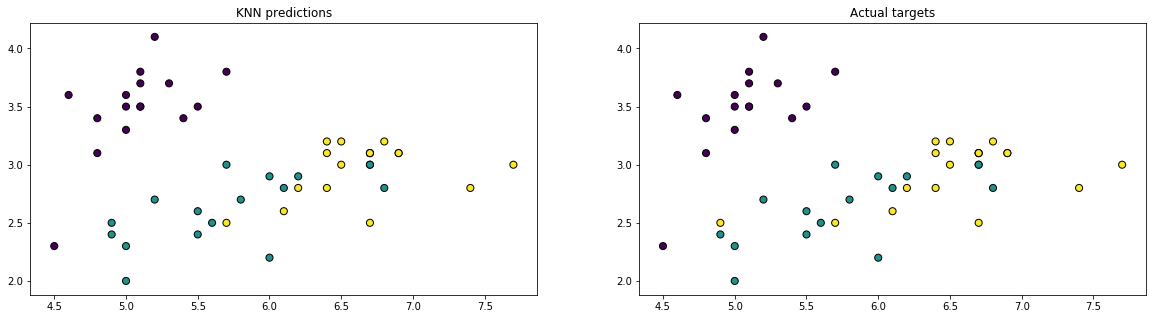

In [127]:
k = 8
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,5)
axes[0].set_title('KNN predictions')
axes[1].set_title('Actual targets')

axes[0].scatter(test_iris_x[:, 0], test_iris_x[:, 1], s=50,
                c=predictions[k], edgecolors='black')

axes[1].scatter(test_iris_x[:, 0], test_iris_x[:, 1], s=50,
                c=test_iris_y, edgecolors='black')

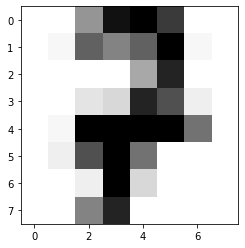

In [128]:
train_digits = np.array(pd.read_csv('/gdrive/My Drive/optdigits.tra', header=None))
test_digits = np.array(pd.read_csv('/gdrive/My Drive/optdigits.tes', header=None))

X_train = train_digits[:,:-1]
Y_train = train_digits[:,-1]
X_test = test_digits[:,:-1]
Y_test= test_digits[:,-1]

plt.imshow(X_train[2].reshape(8,8), cmap='Greys')

In [129]:
ks = np.arange(1,10,1)
predictions = KNN(X_train, Y_train, X_test, ks)

for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 97.9966611018364%
Score for k = 2 is: 97.38452977184195%
Score for k = 3 is: 97.8297161936561%
Score for k = 4 is: 97.60712298274903%
Score for k = 5 is: 97.88536449638286%
Score for k = 6 is: 97.77406789092933%
Score for k = 7 is: 97.66277128547578%
Score for k = 8 is: 97.66277128547578%
Score for k = 9 is: 97.77406789092933%


In [0]:
def cross_validation(X, Y, no=10):
    err_sum = 0
    #Get random indices
    indices = np.random.uniform(0, no, len(X)).astype(int)
    for i in range(no):
        print(f'Test on {i}')
        #Get data to train and test on
        x_train = X[indices != i]
        y_train = Y[indices != i]
        x_test = X[indices == i]
        y_test = Y[indices == i]
        
        ks = np.arange(1,21,2)
        predictions = KNN(x_train, y_train, x_test, ks)
        
        best_k, best_score = 0, 0
        for k, preds in predictions.items():
            result = list(preds == y_test)
            result_cnt = result.count(True) / len(result) * 100
            if result_cnt > best_score:
                best_score = result_cnt
                best_k = k
        err_sum += 100-best_score
        print(f'Best k: {best_k} -> score: {best_score}\nError for {best_k}: {100-best_score}')
        
    print(f'Final error: {err_sum / no}')

In [142]:
cross_validation(train_iris_x, train_iris_y)

Test on 0
Best k: 9 -> score: 100.0
Error for 9: 0.0
Test on 1
Best k: 1 -> score: 100.0
Error for 1: 0.0
Test on 2
Best k: 1 -> score: 87.5
Error for 1: 12.5
Test on 3
Best k: 9 -> score: 100.0
Error for 9: 0.0
Test on 4
Best k: 1 -> score: 100.0
Error for 1: 0.0
Test on 5
Best k: 1 -> score: 100.0
Error for 1: 0.0
Test on 6
Best k: 1 -> score: 100.0
Error for 1: 0.0
Test on 7
Best k: 9 -> score: 100.0
Error for 9: 0.0
Test on 8
Best k: 1 -> score: 100.0
Error for 1: 0.0
Test on 9
Best k: 5 -> score: 100.0
Error for 5: 0.0
Final error: 1.25


In [143]:
cross_validation(X_train, Y_train)

Test on 0
Best k: 1 -> score: 97.66839378238342
Error for 1: 2.3316062176165815
Test on 1
Best k: 1 -> score: 99.50248756218906
Error for 1: 0.4975124378109399
Test on 2
Best k: 7 -> score: 97.96954314720813
Error for 7: 2.030456852791872
Test on 3
Best k: 5 -> score: 98.08743169398907
Error for 5: 1.9125683060109253
Test on 4
Best k: 1 -> score: 99.2248062015504
Error for 1: 0.7751937984496067
Test on 5
Best k: 5 -> score: 98.6413043478261
Error for 5: 1.3586956521739069
Test on 6
Best k: 1 -> score: 99.45205479452055
Error for 1: 0.5479452054794507
Test on 7
Best k: 3 -> score: 99.17355371900827
Error for 3: 0.8264462809917319
Test on 8
Best k: 11 -> score: 98.92761394101876
Error for 11: 1.0723860589812375
Test on 9
Best k: 3 -> score: 98.80668257756562
Error for 3: 1.1933174224343759
Final error: 1.2546128232740628
